# Fish Species classifier


### By Endework Abera

In [33]:
##This project is going to predict the species of a fish with the provided features (weight, lenght, height, and width)

### Reading data

In [1]:
import pandas as pd

# load the training dataset

fish = pd.read_csv('Fish.csv')

# Display a random sample of 10 observations
sample = fish.sample(10)
sample

,Species,Weight,Length1,Length2,Length3,Height,Width
14,Bream,600.0,29.4,32.0,37.2,14.9544,5.1708
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
104,Perch,265.0,25.4,27.5,28.9,7.0516,4.3350
127,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
118,Perch,820.0,36.6,39.0,41.3,12.4313,7.3514
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968


In [4]:
fish_classes = ['bream', 'parkki', 'pearch', 'pike','roach','smelt','whitefish']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in fish.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], row[4],row[5],row[6], int(row[6]),']',fish_classes[int(row[6])])

['Species' 'Weight' 'Length1' 'Length2' 'Length3'] SpeciesName
[ Perch 685.0 34.0 36.5 39.0 10.881 6.864 6 ] whitefish
[ Bream 500.0 26.8 29.7 34.5 14.1795 5.2785 5 ] smelt
[ Whitefish 270.0 23.6 26.0 28.7 8.3804 4.2476 4 ] roach
[ Bream 700.0 30.4 33.0 38.5 14.938 5.1975 5 ] smelt
[ Bream 290.0 24.0 26.3 31.2 12.48 4.3056 4 ] roach
[ Perch 820.0 37.1 40.0 42.5 11.135 6.63 6 ] whitefish
[ Perch 70.0 15.7 17.4 18.5 4.588 2.9415 2 ] pearch
[ Perch 5.9 7.5 8.4 8.8 2.112 1.408 1 ] parkki
[ Pike 500.0 42.0 45.0 48.0 6.96 4.896 4 ] roach
[ Roach 40.0 12.9 14.1 16.2 4.1472 2.268 2 ] pearch


### Data cleaning

In [5]:
# Count the number of null values for each column
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Visualization

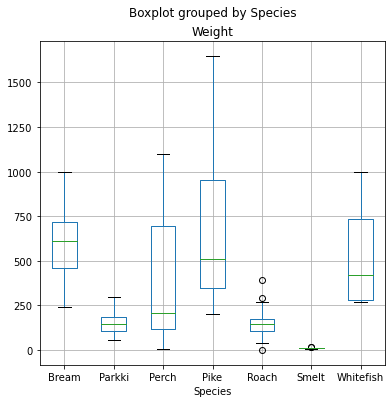

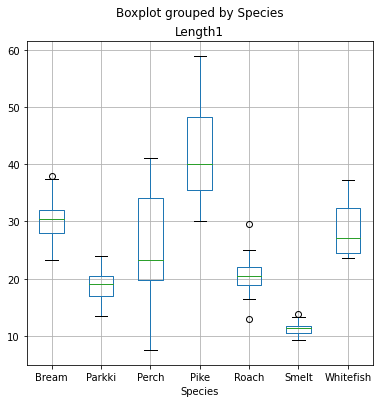

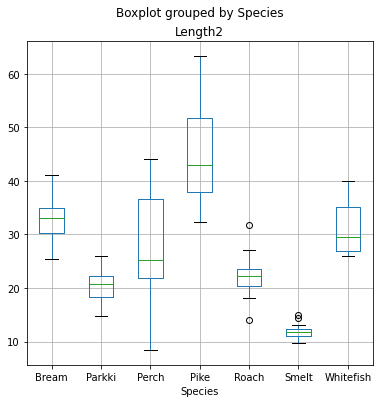

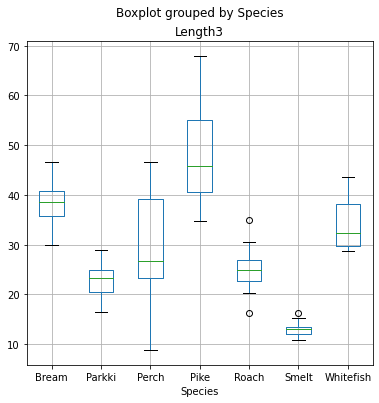

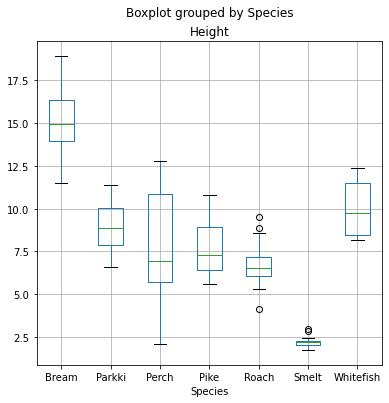

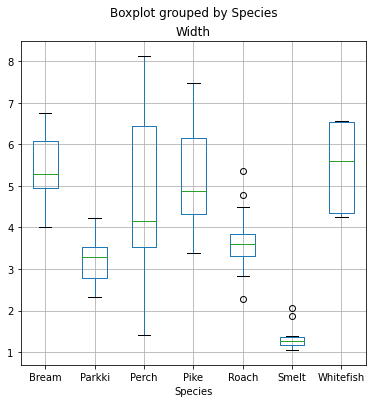

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

fish_features = ['Weight','Length1','Length2','Length3','Height','Width']
fish_label = 'Species'
for col in fish_features:
    fish.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

In [34]:
## train and test data separation

In [10]:
from sklearn.model_selection import train_test_split

# Separate features and labels
fish_x, fish_y = fish[fish_features].values, fish[fish_label].values

# Split data 70%-30% into training set and test set
x_fish_train, x_fish_test, y_fish_train, y_fish_test = train_test_split(fish_x, fish_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=fish_y)

print ('Training Set: %d, Test Set: %d \n' % (x_fish_train.shape[0], x_fish_test.shape[0]))

Training Set: 111, Test Set: 48 



In [ ]:
## testing the data with the LogisiticRegression model

In [11]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_fish_train, y_fish_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


C:\Users\ende\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
fish_predictions = multi_model.predict(x_fish_test)
print('Predicted labels: ', fish_predictions[:15])
print('Actual labels   : ' ,y_fish_test[:15])

Predicted labels:  ['Perch' 'Smelt' 'Bream' 'Pike' 'Perch' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Whitefish' 'Roach' 'Perch' 'Pike' 'Perch']
Actual labels   :  ['Perch' 'Smelt' 'Bream' 'Pike' 'Perch' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Whitefish' 'Roach' 'Perch' 'Pike' 'Perch']


In [14]:
from sklearn. metrics import classification_report

print(classification_report(y_fish_test, fish_predictions))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         3
       Perch       0.94      0.94      0.94        17
        Pike       1.00      1.00      1.00         5
       Roach       1.00      0.50      0.67         6
       Smelt       0.75      0.75      0.75         4
   Whitefish       0.40      1.00      0.57         2

    accuracy                           0.90        48
   macro avg       0.87      0.88      0.85        48
weighted avg       0.93      0.90      0.90        48



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_fish_test, fish_predictions))
print("Overall Precision:",precision_score(y_fish_test, fish_predictions, average='macro'))
print("Overall Recall:",recall_score(y_fish_test, fish_predictions, average='macro'))

Overall Accuracy: 0.8958333333333334
Overall Precision: 0.8701680672268909
Overall Recall: 0.8844537815126051


In [17]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_fish_test, fish_predictions)
print(mcm)

[[11  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 16  0  0  1  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  3  0  3]
 [ 0  0  1  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


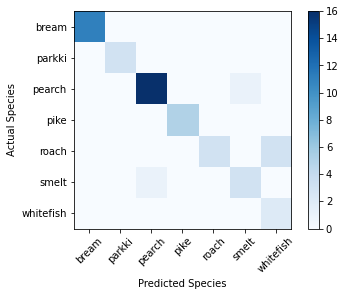

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(fish_classes))
plt.xticks(tick_marks, fish_classes, rotation=45)
plt.yticks(tick_marks, fish_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [22]:
auc = roc_auc_score(y_fish_test,fish_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.975606545903669


In [24]:
import joblib

# Save the model as a pickle file
filename = './fish_model.pkl'
joblib.dump(multi_model, filename)

['./fish_model.pkl']

In [32]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (to predict the classes of multiple fish observations in a single call)
# We'll create an array with a single array of features, representing one fish
x_new = np.array([[242,23.2,25.4,30,11.52,4.02]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In this case, I have only submitted one penguin, so the  prediction is the first one in the resulting array.
fish_pred = multi_model.predict(x_new)[0]
print('Predicted class is', fish_pred)

New sample: [242.    23.2   25.4   30.    11.52   4.02]
Predicted class is Bream
